<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Reviewers comment v1</h1>

Hello Ivey!

Im happy to review your project today 🙌

My name is **Gerardo Flores** and you can find me on the HUB as https://hub.tripleten.com/u/dea170e1

You can find my comments under the heading **«Review»**. I will categorize my comments in green, blue or red boxes like this:

<div class="alert alert-success">
    <b>Success:</b> if everything is done successfully
</div>
<div class="alert alert-warning">
    <b>Remarks:</b> if I can give some recommendations or ways to improve the project
</div>
<div class="alert alert-danger">
    <b>Needs fixing:</b> if the block requires some corrections. Work cant be accepted with the red comments
</div>

Please dont remove my comments :) If you have any questions dont hesitate to respond to my comments in a different section. 
<div class="alert alert-info"> <b>Student comments:</b> For example like this</div>    


<div style="border:solid green 2px; padding: 20px">
<b>Reviewer's comment v2:</b>

    
<b>Overall Feedback</b>
    
Hello Ivey,
    
You’ve resubmitted another project—great work! Your commitment to pushing through the challenges of this program is admirable.

After reviewing your submission, it is approved.
    
   
You can find my more detailed notes within your project notebook in the `Reviewer's comment v2:` section.


If you find yourself uncertain or in need of further insights, never hesitate to consult with your tutor or ask your questions here. We are here to guide and assist you.

<div class="alert alert-block alert-warning">
<b>Reviewer's comment v1</b>
    
It would be immensely helpful if you can add some contextual information at the beginning of the notebook, covering:

- A brief description of the project's objective.
- An overview of the data you're working with.
- Any expected outcomes or results you aim to achieve.

Providing such context allows anyone reviewing or revisiting the notebook to quickly understand its purpose and the data being used, ensuring smoother collaboration and more intuitive navigation.

</div>

In [1]:
#Import Core
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('/datasets/users_behavior.csv')

#Classify Metrics To Understand Trends
df.loc[df['is_ultra'] == 1, 'membership'] = 'Ultra'
df.loc[df['is_ultra'] == 0, 'membership'] = 'Smart'

print(df.head())
print()
df.info()
print()
#Visualize Distribution Of Data In Dataset
df['membership'].value_counts(normalize=True)

   calls  minutes  messages   mb_used  is_ultra membership
0   40.0   311.90      83.0  19915.42         0      Smart
1   85.0   516.75      56.0  22696.96         0      Smart
2   77.0   467.66      86.0  21060.45         0      Smart
3  106.0   745.53      81.0   8437.39         1      Ultra
4   66.0   418.74       1.0  14502.75         0      Smart

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   calls       3214 non-null   float64
 1   minutes     3214 non-null   float64
 2   messages    3214 non-null   float64
 3   mb_used     3214 non-null   float64
 4   is_ultra    3214 non-null   int64  
 5   membership  3214 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 150.8+ KB



Smart    0.693528
Ultra    0.306472
Name: membership, dtype: float64

In [2]:
#Visualize Overall Stats Between Memberships
df.groupby('membership').describe()

calls                                                       \
             count       mean        std  min   25%   50%    75%    max   
membership                                                                
Smart       2229.0  58.463437  25.939858  0.0  40.0  60.0   76.0  198.0   
Ultra        985.0  73.392893  43.916853  0.0  41.0  74.0  104.0  244.0   

           minutes              ...   mb_used           is_ultra            \
             count        mean  ...       75%       max    count mean  std   
membership                      ...                                          
Smart       2229.0  405.942952  ...  20043.06  38552.62   2229.0  0.0  0.0   
Ultra        985.0  511.224569  ...  26837.72  49745.73    985.0  1.0  0.0   

                                     
            min  25%  50%  75%  max  
membership                           
Smart       0.0  0.0  0.0  0.0  0.0  
Ultra       1.0  1.0  1.0  1.0  1.0  

[2 rows x 40 columns]

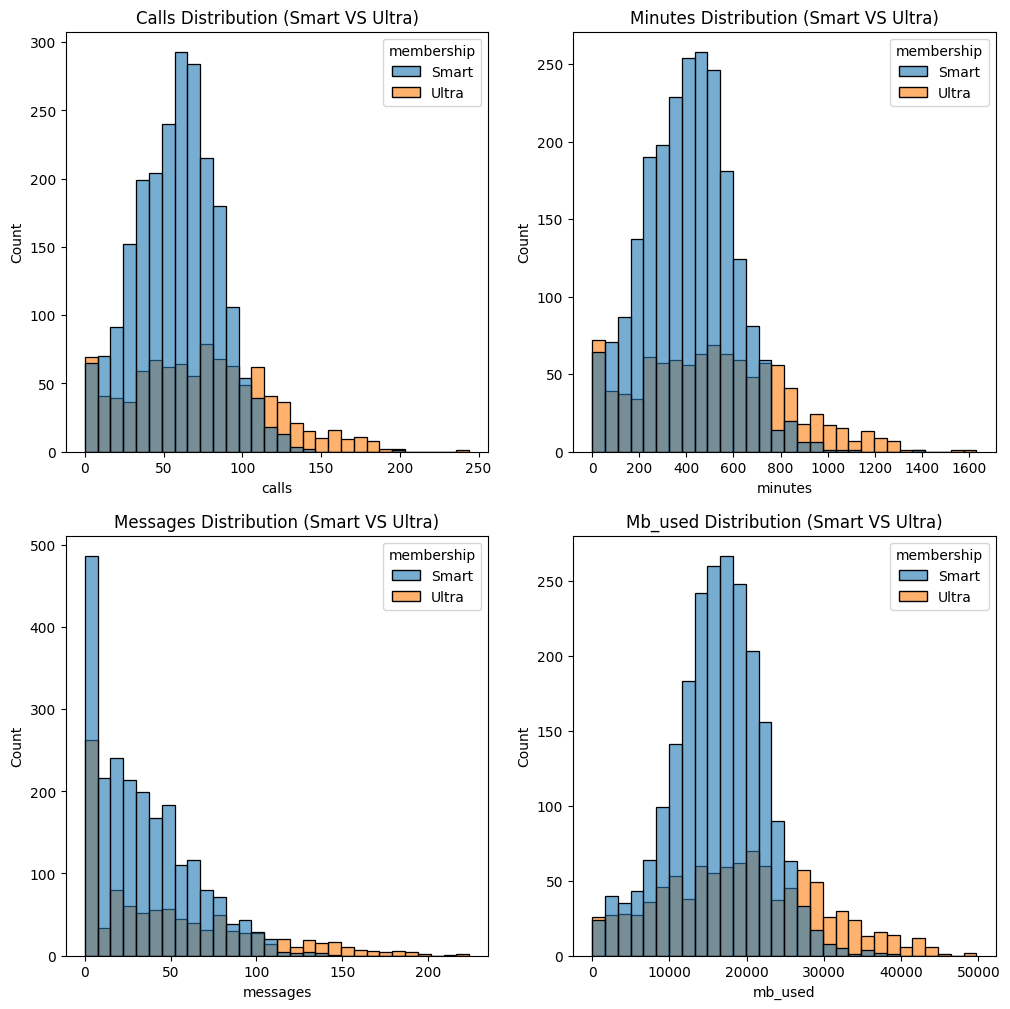

In [3]:
#Visually Plot Trends To Understand The Determining Point Where Clients Start To Lean Towards Choosing Ultra Membership
metrics = ['calls', 'minutes', 'messages', 'mb_used']
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
axes = axes.flatten()

for i, col in enumerate(metrics):
    sns.histplot(data=df, x=col, hue='membership', bins=30, alpha=0.6, ax=axes[i])
    axes[i].set_title(f'{col.capitalize()} Distribution (Smart VS Ultra)')
    
plt.tight_layout
plt.show()

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b>

Great data overview!

In [4]:
#Import Models And Tools For Deployment 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [5]:
features = df.drop(['is_ultra', 'membership'], axis=1)
target = df['membership']

features_train_valid, features_test, target_train_valid, target_test = train_test_split(features, target, test_size=0.2, random_state=12345, stratify=target)

features_train, features_valid, target_train, target_valid = train_test_split(features_train_valid, target_train_valid, test_size=0.25, random_state=12345, stratify=target_train_valid)

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b>

Well done!

In [6]:
#Create Function To Determine Metrics To Find Best Model
def eval_model(name, model,Xv, yv):
    preds = model.predict(Xv)
    print(f'\n{name}')
    print('Accuracy:', accuracy_score(yv, preds))
    print('Precision:', precision_score(yv, preds, average='macro'))
    print('Recall:', recall_score(yv, preds, average='macro'))
    print('F1:', f1_score(yv, preds, average='macro'))

In [7]:
#Best Decision Tree
best_dt = None
best_dt_f1 = -1

for depth in [3, 5, 7, 9, None]:
    for split in [2, 10, 20]:
        for crit in ['gini', 'entropy']:
            dt = DecisionTreeClassifier(
                max_depth=depth,
                min_samples_split=split,
                criterion=crit,
                random_state=12345,
                class_weight='balanced'
            )
            dt.fit(features_train, target_train)
            preds = dt.predict(features_valid)
            f1 = f1_score(target_valid, preds, average='macro')
            if f1 > best_dt_f1:
                best_dt_f1, best_dt = f1, dt
eval_model('Best Decision Tree', best_dt, features_valid, target_valid)
print('Best Decision Tree Hyperparameters:', best_dt.get_params())


Best Decision Tree
Accuracy: 0.80248833592535
Precision: 0.7738251071584406
Recall: 0.7428467369283649
F1: 0.7546192377844485
Best Decision Tree Hyperparameters: {'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 12345, 'splitter': 'best'}


In [8]:
best_rf = None
best_rf_f1 = -1

for n in [100, 300, 600]:
    for depth in [None, 10, 20]:
        for mf in ['sqrt', 'log2', None]:
            rf = RandomForestClassifier(
                n_estimators=n,
                max_depth=depth,
                max_features=mf,
                random_state=12345,
                n_jobs=-1,
                class_weight='balanced'
            )
            rf.fit(features_train, target_train)
            preds = rf.predict(features_valid)
            f1 = f1_score(target_valid, preds, average='macro')
            if f1 > best_rf_f1:
                best_rf_f1, best_rf = f1, rf
eval_model('Best Random Forest:', best_rf, features_valid, target_valid)
print('Best Random Forest Hyperparameters:', best_rf.get_params())


Best Random Forest:
Accuracy: 0.8211508553654744
Precision: 0.800365392144069
Recall: 0.7619676310577952
F1: 0.7762666222901318
Best Random Forest Hyperparameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 600, 'n_jobs': -1, 'oob_score': False, 'random_state': 12345, 'verbose': 0, 'warm_start': False}


In [9]:
scaler = StandardScaler()
Xtr = scaler.fit_transform(features_train)
Xva = scaler.transform(features_valid)

best_lr = None
best_lr_f1 = 0

for solver in ['liblinear', 'saga']:
    for C in [0.1, 0.5, 1.0, 2.0, 5.0]:
        lr = LogisticRegression(
            solver=solver,
            C=C,
            max_iter=2000,
            random_state=12345,
            class_weight='balanced'
        )
        lr.fit(Xtr, target_train)
        preds = lr.predict(Xva)
        f1 = f1_score(target_valid, preds, average='macro')
        if f1 > best_lr_f1:
            best_lr_f1, best_lr = f1, (lr, scaler)
eval_model('Best Logistic Regression', best_lr[0], Xva, target_valid)
best_model, best_scaler = best_lr
print('Best Logistic Regression Hyperparameters:', best_model.get_params())


Best Logistic Regression
Accuracy: 0.656298600311042
Precision: 0.6295584271444427
Recall: 0.6488015296715304
F1: 0.6291414061011606
Best Logistic Regression Hyperparameters: {'C': 0.1, 'class_weight': 'balanced', 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 2000, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 12345, 'solver': 'saga', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b>

Well done!

In [10]:
#Perform Test
preds_test = best_rf.predict(features_test)
print('Test Accuracy:', accuracy_score(target_test, preds_test))
print('Test Precision:', precision_score(target_test, preds_test, average='macro'))
print('Test Recall:', recall_score(target_test, preds_test, average='macro'))
print('Test F1:', f1_score(target_test, preds_test, average='macro'))

Test Accuracy: 0.8164852255054432
Test Precision: 0.8062159199099853
Test Recall: 0.7416004643645717
Test F1: 0.7613785034972074


In this project, we evaluated three machine learning models: Decision Tree, Random Forest, and Logistic Regression. Logistic Regression demonstrated the weakest performance overall, while the Decision Tree model produced stable but less competitive results. The Random Forest classifier emerged as the best-performing model, achieving the highest balance across all evaluation metrics.

To validate the model, we conducted a final test using the Random Forest classifier. The results were as follows:

Accuracy: 0.816

Precision: 0.806

Recall: 0.741

F1 Score: 0.761

These outcomes confirm that the Random Forest model provides the most effective solution among the models tested, offering strong predictive performance and generalization capability. Based on these findings, we recommend deploying the Random Forest classifier as the final model.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b>

Great conclusions!